In [28]:
import matplotlib.pyplot as plt
import random
import statistics

class Player:
    """ Records roll results
    knows name   # self.name
    knows score  # self.score, 0 at init
    determines roll or hold  # roll_again()
    Basic 1 turn only
    """

    def __init__(self, name="Basic"):
        self.name = name
        self.score = 0
        self.rolls = []

    def record_roll(self, roll):
        """Die tells Player what the roll was, Player records in rolls list"""
        self.rolls.append(roll)


    def roll_again(self, turn_score):
        # answer = input("Roll again?").lower()
        # if answer[0] == 'y':
        #     return True
        # else:
        return False

    def __str__(self):
        return "Player: {} Score: {} rolls: {}".format(self.name, self.score, self.rolls
                                                       )

class Turn:
    """rolls the die
        records results in turn_result list
        tells player the turn_result sum at the end of the turn
        asks player to roll again
    """
    def __init__(self, player, die):
        self.turn_score = 0
        self.player = player
        self.turn_over = False
        self.die = die

    def record_roll(self, roll):
        if roll == 1:
            self.turn_over = True
            self.turn_score = 0
        else:
            self.turn_score += roll

    def run(self):
        while not self.turn_over:
            self.go()

    def go(self):
        roll = self.die.roll()
        self.record_roll(roll)
        self.player.record_roll(roll)
        #print("{} you rolled a {} and your turn score is {}".format(self.player.name, roll, self.turn_score))
        if not self.turn_over:
            self.turn_over = not self.player.roll_again(self.turn_score)


class Die:
    def roll(self):
        return random.randint(1,6)

class Game:

    def __init__(self, player):
        # HELP! Is this redundant? can I just do self.num_turns = 0?
        # self.number_of_turns = number_of_turns
        # need a counter so can max out at 7
        self.number_of_turns = 0
        self.die = Die()
        self.player = player
        self.game_score = 0
        self.is_win = False
        self.is_game_over = False

    def start(self):
        all_scores = []
        while not self.is_win and self.number_of_turns < 7 and not self.is_game_over:
            turn = Turn(self.player, self.die)
            turn.run()
            self.game_score += turn.turn_score
            self.number_of_turns += 1
            ## HELP! Where do I put my Turn Count logic???
            #print("{}'s score is now {}".format(self.player, self.player.score))
            ##TODO: when to run winner() to determine winner. every roll?
        if self.number_of_turns >= 7:
                #IF GAME IS OVER Do...
                #rgather score
                all_scores = self.game_score
                #print(self.game_score)
                self.is_game_over = True
                turn.turn_over = True
                # HOW TO STOP
        return all_scores


    def winner(self):
        if self.player.score < 100:
            return False
        else:
            return True

class BasicPlayer(Player):

    # TODO HELP! If Basic Player always rolls 1 but TURN calls die.roll()
    #  and die.roll() makes it random, how do i let BasicPlayer override
    #  all of that and make die.roll() return 1?!
    # ANSWER: YOU DON'T! BasicPlayer just ROLLS ONCE
    def roll_again(self, turn_score):
        #answer = input("Roll again?").lower()
        return False



class ScaredPlayer(Player):
    """Plays until reaches one standard deviation above the mean of Basic Player then holds"""

    def __init__(self):
        super().__init__("Scaredycat")

    def roll_again(self, turn_score):
        if turn_score > 25:
            return False
        else:
            return False
        


class BrilliantPlayer(Player):

    def __init__(self):
        super().__init__("BrilliantDiva")

    def roll_again(self, turn_score):
        pass


# if __name__ == '__main__':
#     player = BasicPlayer("URSoBasic")
# 
#     game = Game(player)
#     print(game.game_score)
#     game.start()



# plot your number of trials

# chart mean, standard dev, showing the normal distro
#prove which strategy is best
#look up a winning strategy, implement it and then graph results

#ran trials till hit a 1, plotted a hist of how many it took to get to before hit one

#base player's mean is usually right around 27

In [36]:
%matplotlib inline
#Launch BasicPlayer Game 10 trials

In [37]:
all_trial_scores = []
#for i in range(10-1)
for i in range(10):
    player = BasicPlayer("URSoBasic")
    game = Game(player)
    all_trial_scores.append(game.start())

In [38]:
all_trial_scores

[19, 24, 26, 16, 26, 32, 24, 29, 22, 13]

In [39]:
# proof that repeater works. Now run trials a meaningful number of times (Roomba did 1000 first)

In [40]:
all_trial_scores = []
#for i in range(1000-1)
for i in range(1000):
    player = BasicPlayer("URSoBasic")
    game = Game(player)
    all_trial_scores.append(game.start())

In [41]:
mean = statistics.mean(all_trial_scores)
stdev = statistics.stdev(all_trial_scores)
print("mean for 1000 runs of {} is {}".format(player.name, mean))
print("standard deviation for 1000 runs of {} is {}".format(player.name, stdev))

mean for 1000 runs of URSoBasic is 23.168
standard deviation for 1000 runs of URSoBasic is 5.362885094474478


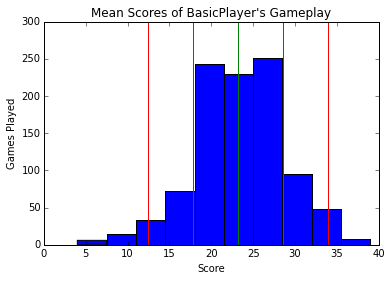

In [42]:
plt.hist(all_trial_scores)
plt.xlabel("Score")
plt.ylabel("Games Played")
ymin,ymax = plt.ylim()
plt.title("Mean Scores of BasicPlayer's Gameplay")
plt.vlines(mean, ymin, ymax, color="green")
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, color="red")
plt.show()


We see that BasicPlayer's mean score falls at 23. Let's s